In [1]:
from mshr import *
import dolfin as df
from fenics import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define mesh and define finite element function space
domain = Circle(df.Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'Lagrange', 1)

In [5]:
# Definie boundary condition
w_D = Constant(0)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

In [6]:
# Define load
beta = 8.0
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2) * (pow(x[0], 2) + pow(x[1]- R0, 2)))', degree=1, beta=beta, R0=R0)

In [7]:
# Defining variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v)) * dx
L = p * v * dx

In [8]:
# Solve the weak form
w = Function(V)
solve(a == L, w, bc)

Text(0.5, 0, '$x$')

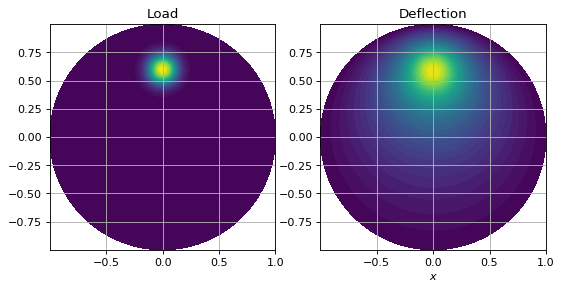

In [18]:
# Plot solution
p = interpolate(p, V)
plt.figure(figsize=(8, 8), dpi=80)
plt.subplot(1,2,1)
plot(p, title='Load'); plt.grid()
plt.subplot(1,2,2)
plot(w, title='Deflection'); plt.grid()
plt.xlabel('$x$')

In [10]:
# Curve plot along x = 0 comparing p and w
import numpy as np
TOL = 1E-3   # avoid hitting points outside the domain
y = np.linspace(-1 + TOL, 1- TOL, 101)

In [11]:
points = [(0, y_) for y_ in y]   # 2D points

In [12]:
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])

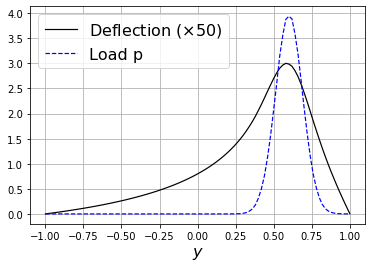

In [13]:
plt.figure()
plt.plot(y, 50 * w_line, 'k-', linewidth=1.2)  # magnify w by a factor 50
plt.plot(y, p_line, 'b--', linewidth=1.2)
plt.grid(); plt.xlabel(r'$y$', fontsize=16)
plt.legend(['Deflection ($\\times 50$)', 'Load p'], loc='upper left', fontsize=16)